<a href="https://colab.research.google.com/github/vaqanzel/Mesin-Learning/blob/main/TI_3C_Valentina_Santi_Grehasta_JS04_SOAL_KUIS1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Valentina Santi Grehasta

Kelas : TI-3C

NIM : 2341720016

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [52]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [53]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [54]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [55]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [56]:
# Data Size
df.shape

(48842, 15)

In [57]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [58]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


Hasil inspeksi data menunjukkan bahwa terdapat tiga variabel yang memiliki nilai hilang, yaitu
- workclass sebanyak 963 nilai hilang
- occupation sebanyak 966 nilai hilang
- native-country sebanyak 274 nilai hilang

Variabel lain tidak memiliki nilai yang hilaang.

## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [62]:
df['workclass'].fillna("Unknown", inplace=True)
df['occupation'].fillna("Unknown", inplace=True)
df['native-country'].fillna("Unknown", inplace=True)

/tmp/ipython-input-3946736373.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].fillna("Unknown", inplace=True)
/tmp/ipython-input-3946736373.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [63]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


Semua nilai missing 0, artimya sudah tidak ada data yang hilang.

## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [64]:
print(df['workclass'].value_counts())
print('==================================')
print(df['occupation'].value_counts())
print('==================================')
print(df['native-country'].value_counts())
print('==================================')
print(df['education'].value_counts())
print('==================================')
print(df['marital-status'].value_counts())
print('==================================')
print(df['relationship'].value_counts())
print('==================================')
print(df['race'].value_counts())
print('==================================')
print(df['sex'].value_counts())
print('==================================')
print(df['income'].value_counts())

workclass
Private             35742
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Unknown               963
Without-pay            21
Never-worked           10
Name: count, dtype: int64
occupation
Prof-specialty       8015
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Unknown               966
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64
native-country
United-States                 44415
Mexico                          951
Philippines                     295
Unknown                         274
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155


In [65]:
df['workclass'] = df['workclass'].replace({'?': 'Others'})
df['occupation'] = df['occupation'].replace({'?': 'Others'})
df['native-country'] = df['native-country'].replace({'?': 'Others', 'Holand-Netherlands': 'Others', 'Trinadad&Tobago': 'Trinidad&Tobago', 'South': 'South Korea', 'Hong': 'Hong Kong'})
df['income'] = df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})

# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

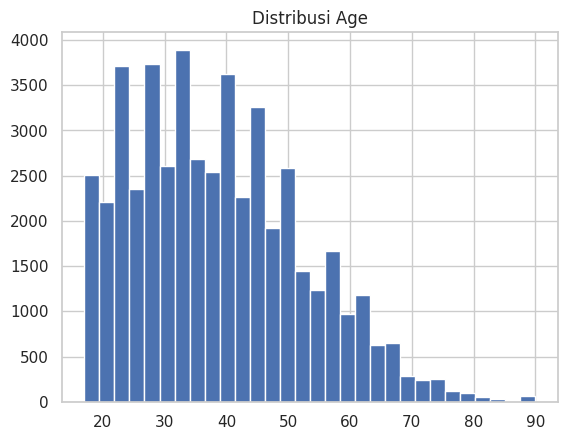

In [67]:
plt.hist(df['age'], bins=30)
plt.title('Distribusi Age')
plt.show()

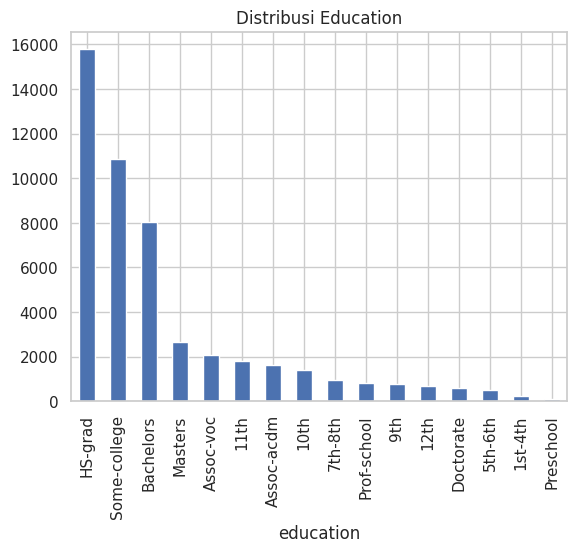

In [70]:
df['education'].value_counts().plot(kind='bar')
plt.title('Distribusi Education')
plt.show()

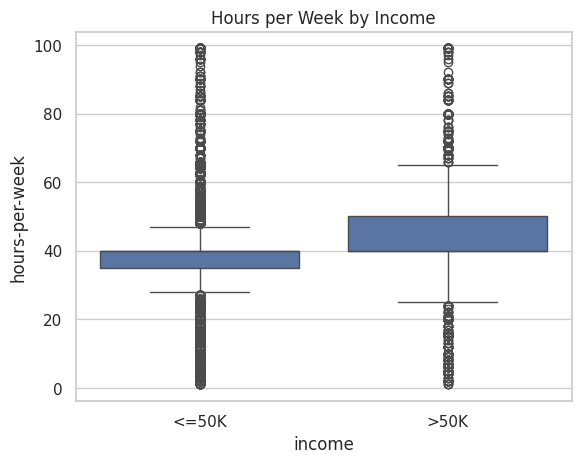

In [71]:
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Hours per Week by Income')
plt.show()

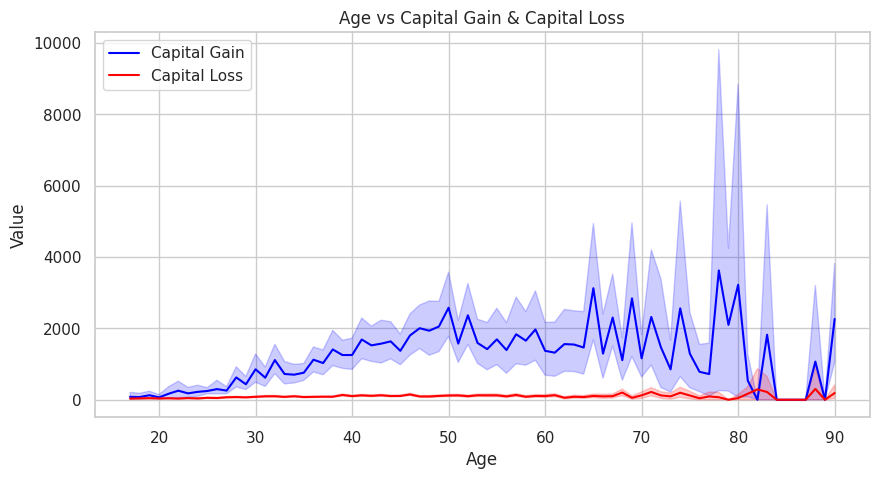

In [73]:
sns.set(style="whitegrid")

plt.figure(figsize=(10,5))
sns.lineplot(x="age", y="capital-gain", data=df, label="Capital Gain", color="blue")
sns.lineplot(x="age", y="capital-loss", data=df, label="Capital Loss", color="red")
plt.title("Age vs Capital Gain & Capital Loss")
plt.xlabel("Age")
plt.ylabel("Value")
plt.legend()
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [ ]:
# Jawab dengan komentar python

'''
 1. Fenomena pada distribusi data 'age' :
    - Distribusi 'age' condong ke kanan (right-skewed)
    - Mayoritas responden berusia 20-50 tahun

 2. Strategi jika terdapat data yang hilang pada variabel 'age":
    Menggunakan median.
    Median lebih tahan terhadap outlier dibanding mean, sehingga tidak bias oleh nilai ekstrem.
    Menggunakan mean jika tidak terdapat outlier dan menggunakan median jika terdapat outlier

 3. Jumlah outlier pada setiap kategori 'income' terhadap 'hour-per-week':
    - Income <=50K : terdapat cukup banyak outlier (misalnya jam kerja <20 atau >60 per minggu)
    - Income >50K : terdapat lebih banyak outlier, dengan jam kerja ekstrem hingga mendekati 100 jam
    - Kategori yang paling banyak memiliki outlier adalah income >50K
'''

'\n  Bisa dengan multiple comment\n  seperti ini\n'

# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['sex'])
df['income'] = le.fit_transform(df['income'])

print(df[['sex', 'income']].head())


      sex  income
0    Male       0
1    Male       0
2    Male       0
3    Male       0
4  Female       0


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

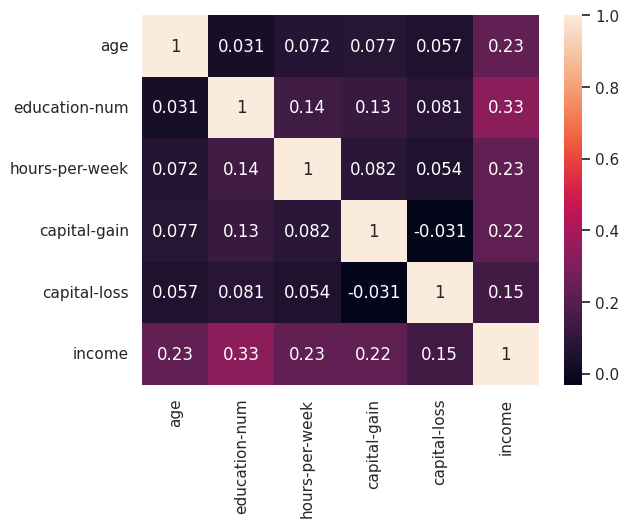

In [75]:
df_selected = df[['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']]
corr = df_selected.corr()

sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
'''
Berdasarkan analisis korelasi, variabel education-num memiliki hubungan paling kuat dengan income,
menunjukkan bahwa semakin tinggi pendidikan maka semakin besar peluang memiliki penghasilan >50K.
Selain itu, variabel age, hours-per-week, dan capital-gain juga menunjukkan korelasi positif moderat terhadap income.
Sementara itu, capital-loss memiliki pengaruh paling kecil terhadap income dibandingkan variabel lainnya.

'''

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [30]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


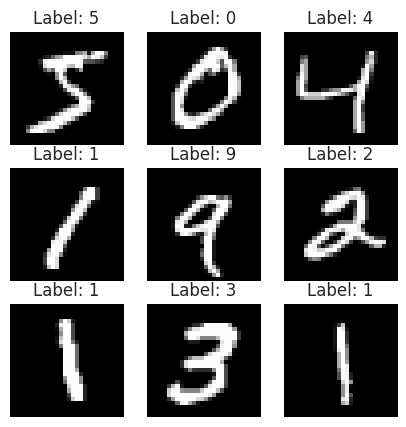

In [31]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

In [76]:
import cv2

X_test_resized = [cv2.resize(img, (32, 32)) for img in X_test]

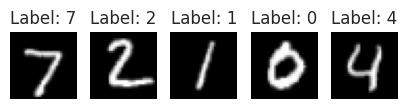

In [77]:
plt.figure(figsize=(5,5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test_resized[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.show()

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

In [78]:
print("Sebelum normalisasi:", X_test.min(), X_test.max())

X_test_normalized = [img / 255.0 for img in X_test_resized]

print("Setelah normalisasi:", X_test_norm.min(), X_test_norm.max())
print("Shape:", X_test_norm.shape)


Sebelum normalisasi: 0 255
Setelah normalisasi: 0.0 1.0
Shape: (10000, 28, 28)


## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [80]:
X_test_flattened = np.array([img.flatten() for img in X_test_resized_norm])

print("Shape sesudah flatten:", X_test_flattened.shape)
print("Contoh 50 nilai pertama dari data flatten[0]:", X_test_flattened[0][:50])


Shape sesudah flatten: (10000, 1024)
Contoh 50 nilai pertama dari data flatten[0]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
